In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def greyscale_from_array(im, brightening_factor=1):
    #stack the three channels side by side
    rgb = np.hstack((im[::,::,0:1:],im[::,::,1:2:],im[::,::,2:3:]))

    #change each list of one integer to just that integer
    rgb_fixed = np.zeros((rgb.shape[0], rgb.shape[1]))
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            rgb_fixed[i][j] = rgb[i][j][0]*brightening_factor

    #return the greyscale image
    return rgb_fixed

def load_images_to_dict(folder="train"):
    #for switching between "train", "test", and "valid" folders
    path = (folder + "/" + folder)

    #makes a dictionary mapping species to all the files in that folder
    directories = {}
    for species_file in os.listdir(path):
        directories[species_file] = os.listdir(path  + "/" + species_file)

    #makes a dictionary mapping species to arrays for each image in that folder
    #looks like images[species] = [MxNarray, MxNarray, ..., MxNarray]
    images = {}
    for directory in directories.keys():
        images[directory] = []
        for file in os.listdir(path + "/" + directory): 
            images[directory].append(np.array(Image.open(path + "/" + directory + "/" + file).convert("L")))

    #return that dictionary
    return images

train_images = load_images_to_dict()
test_images = load_images_to_dict("test")

c:\Users\nvgar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


KNN

In [2]:
train_group = train_images["Chinar"]
test_group = test_images["Chinar"]

X = []
y = []

for key, value in train_images.items():
    for image in value:
        X.append(image)
        if key == "Chinar":
            y.append(1)
        else:
            y.append(0)

X_test = []
y_test = []
for key, value in test_images.items():
    for image in value:
        X_test.append(image)
        if key == "Chinar":
            y_test.append(1)
        else:
            y_test.append(0)


y = np.array(y)
X = np.array(X)
X = np.reshape(X, (X.shape[0], X.shape[1]*X.shape[2]))

y_test = np.array(y_test)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

neighbors = np.arange(1, 110)
test_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    # KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    train_accuracy[i] = knn.score(X, y)
    test_accuracy[i] = knn.score(X_test, y_test)
    # Predictions on the test set
    predictions = knn.predict(X_test)
    # Accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
# for i in range(y_test.shape[0]):
#     print(str(predictions[i]) + " is really: " + str(y_test[i]))

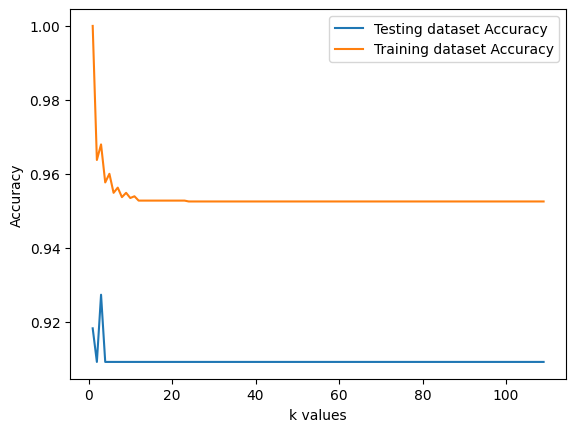

In [3]:
# Plot 
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy")
plt.legend()
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

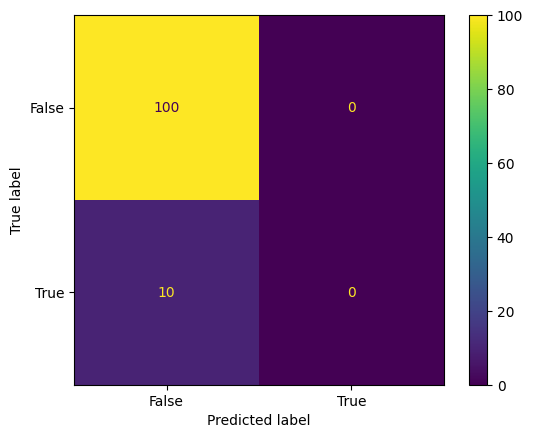

In [ ]:
# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

True Negative (Top Left)
False Positive (Top Right)
False Negative (Bottom Left)
True Positive (Bottom Right)

True = accurately predicted
False = incorrectly predicted

Neural Nets

In [26]:
# Neural Network
print(X.shape)
print(y.shape)
y = np.reshape(y, (y.shape[0], 1))
model = tf.keras.Sequential([
    tf.keras.layers.Dense(146, activation='relu', input_shape=(21600,)),
    tf.keras.layers.Dense(74, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

history = model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)


(4274, 21600)
(4274, 1)


c:\Users\nvgar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\nvgar\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9051 - loss: 141.7850
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9326 - loss: 18.8861
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9255 - loss: 21.7914
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9301 - loss: 14.9253
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9309 - loss: 17.1300
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9327 - loss: 6.0190
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9503 - loss: 3.8383
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9545 - loss: 1.4628
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9554 - loss: 0.8643
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9628 - loss: 0.6911
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9344 - loss: 1.1467 
Test accuracy: 0.9454545378684998
Test loss: 0.90587270259857